In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df1 = pd.read_csv("Unemployment_india.csv")
print(df1.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0 

In [25]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [27]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [28]:
df1.shape

(768, 7)

Drop missing values

In [29]:
df1=df1.dropna()

In [30]:
df1.shape

(740, 7)

In [31]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


count of records by region  

C:\Users\po\AppData\Local\Temp\ipykernel_12524\1142214392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Region",data=df1,palette="mako")


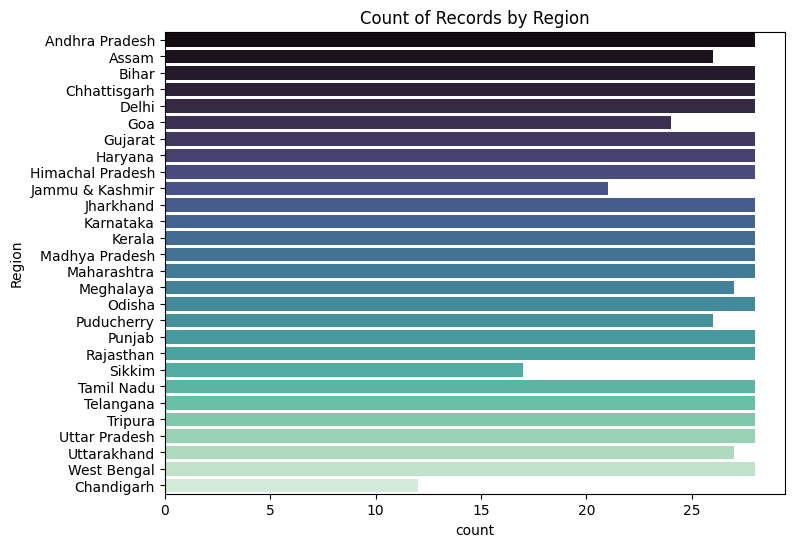

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(y="Region",data=df1,palette="mako")
plt.title("Count of Records by Region")
plt.show()

Count of Records by Area

C:\Users\po\AppData\Local\Temp\ipykernel_12524\2440549839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Area", data=df1, palette=palette)


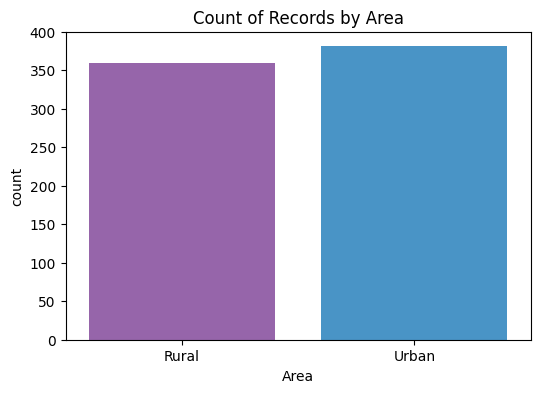

In [33]:
palette = {"Rural": "#9b59b6", "Urban": "#3498db"}  

plt.figure(figsize=(6,4))
sns.countplot(x="Area", data=df1, palette=palette)
plt.title("Count of Records by Area")
plt.show()

Average, Highest and Lowest Unemployment Rate

In [34]:
avg_unemployment_rate=df1.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate:.2f}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate:.2f}")

state  with  high employment : Tripura
high employment rate : 28.35
state  with  low employment : Meghalaya
low employment rate : 4.80


Bar plot of average unemployment rate

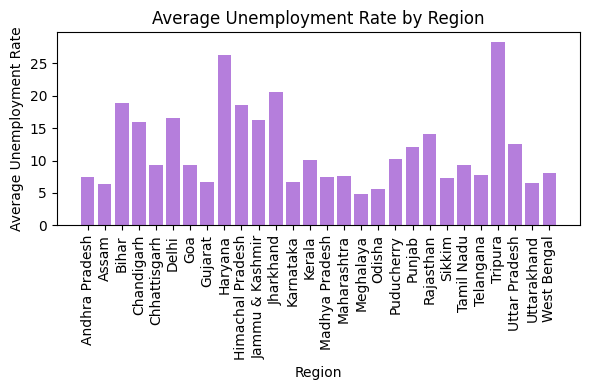

In [35]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(6,4))
plt.bar(regions, avg_rates, color='#b57edc')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Distribution plots

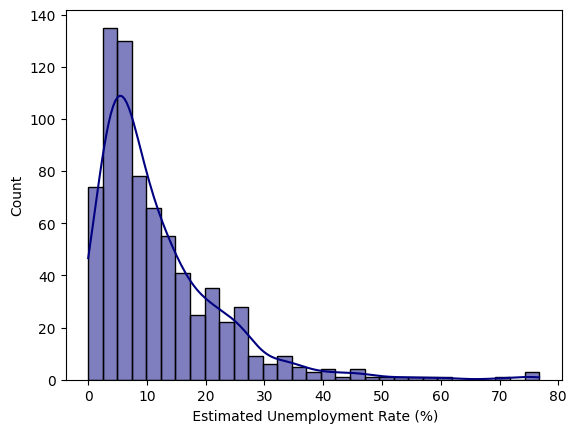

In [36]:
sns.histplot(data=df1, x=" Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()

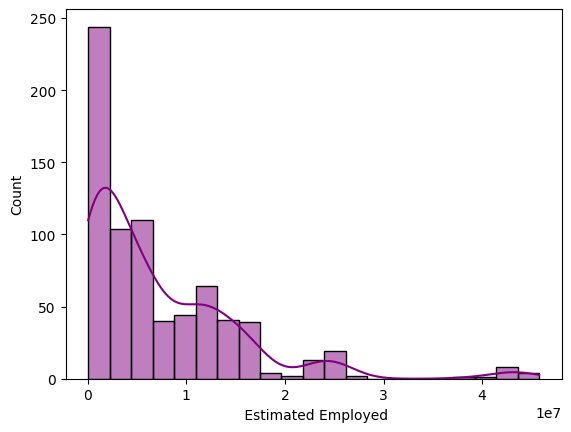

In [37]:
sns.histplot(data=df1, x=" Estimated Employed", kde=True,color="purple")
plt.show()

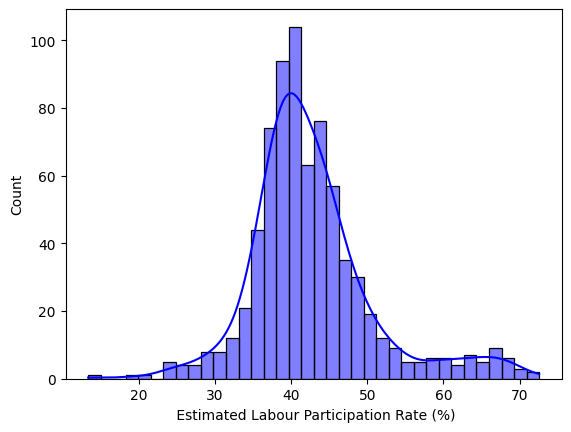

In [38]:
sns.histplot(data=df1, x=" Estimated Labour Participation Rate (%)", kde=True,color="blue")
plt.show()

Unemployment Rate vs. Labor Participation Rate

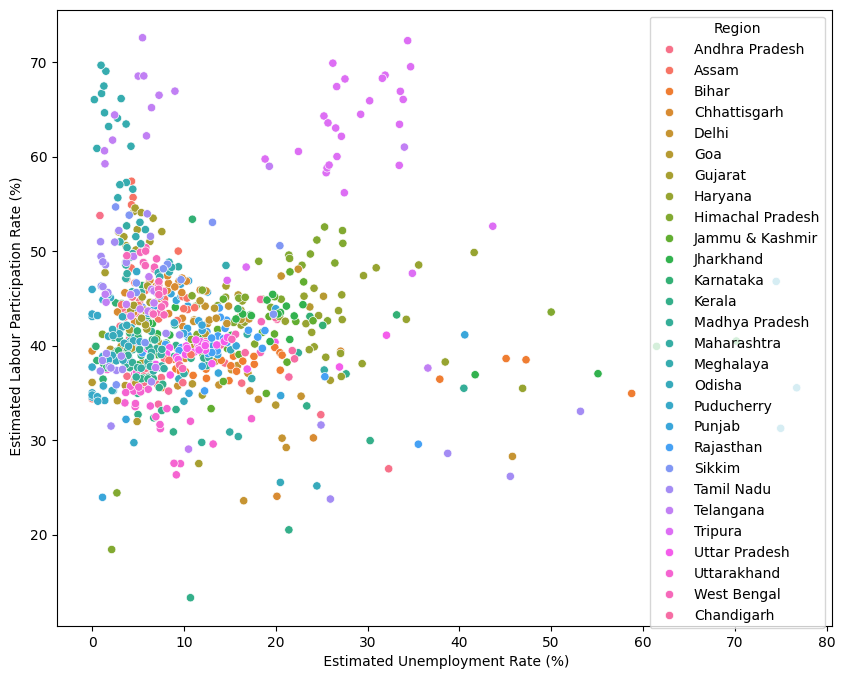

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x=" Estimated Unemployment Rate (%)", y=" Estimated Labour Participation Rate (%)", hue="Region")
plt.show()

The average of the Estimated Unemployment Rate by year

In [40]:
df1[' Date'] = pd.to_datetime(df1[' Date'])
df_2019 = df1[df1[' Date'].dt.year == 2019]
df_2020 = df1[df1[' Date'].dt.year == 2020]
mean_2019 = df_2019[' Estimated Unemployment Rate (%)'].mean()
mean_2020 = df_2020[' Estimated Unemployment Rate (%)'].mean()

print(f"The average of the Estimated Unemployment Rate for 2019:{mean_2019:.2f}")
print(f"The average of the Estimated Unemployment Rate for 2020: {mean_2020:.2f}")

The average of the Estimated Unemployment Rate for 2019:9.40
The average of the Estimated Unemployment Rate for 2020: 15.10


C:\Users\po\AppData\Local\Temp\ipykernel_12524\2854967541.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[' Date'] = pd.to_datetime(df1[' Date'])


Comparison of the Average Unemployment Rate: 2019 vs 2020

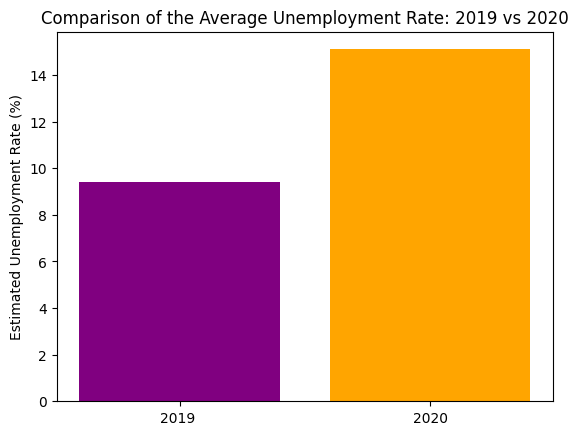

In [41]:
years = ['2019 ', '2020' ]
values = [mean_2019, mean_2020]
plt.bar(years, values, color=['purple', 'orange'])
plt.title("Comparison of the Average Unemployment Rate: 2019 vs 2020")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()